<a href="https://colab.research.google.com/github/Harshabobbiti626/Computational-Statistics-Techniques/blob/main/Principal_Component_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis (PCA)

Principal component analysis is a statistical procedure that helps to reduce the number of variables in a data set by breaking them down into smaller, more manageable parts. Each of the components is chosen based on its importance and its ability to explain most of the variation in the data. All of the components are orthogonal to each other, meaning that they don't affect each other's ability to explain the data. The first component, which has the highest variance, is chosen as the main component.



**Uses:**

The correlation coefficient is a way of measuring how closely two sets of data are related.

It helps to interpret and visualize data. The number of variables is decreasing it makes further analysis simpler.

It can be used to visualize genetic distance and relatedness between populations.

**Objectives:**

PCA is a way of reducing the number of variables in a data set. It does this by selecting a subset of variables that have the highest correlation with the principal amount. It is a dimension reduction process.

**STEPS INVOLVED IN PERFORMING PCA**

-Importing the libraries.

-Importing the data set.

-Splitting the dataset into the Training set and Test set.

-Feature Scaling.

-Applying PCA function.

-Fitting Logistic Regression To the training set.

-Predicting the test set result.

-Making the confusion matrix.

-Predicting the training set result.

-Visualizing the Test set results.






In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Computational Statistics datasets/Wine.csv')

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [6]:
# Splitting the X and Y into the training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [9]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [10]:
# Predicting the test set result using predict function under LogisticRegression
y_pred = classifier.predict(X_test)


In [11]:
# making confusion matrix between test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


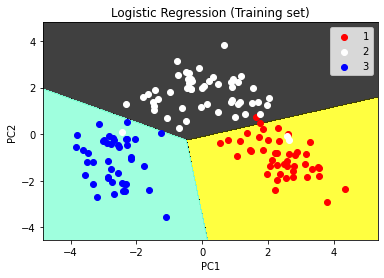

In [13]:
# Predicting the training set result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'black', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'white', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # Xlabel
plt.ylabel('PC2') # Ylabel
plt.legend()      # to show legend

# to show plot
plt.show()


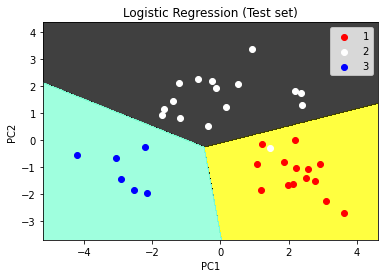

In [14]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'black', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'white', 'blue'))(i), label = j)


plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # Xlabel
plt.ylabel('PC2') # Ylabel
plt.legend()

# to show plot
plt.show()
